In [ ]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud

In [ ]:
url = "https://raw.githubusercontent.com/khanhle08/BusinessProject/main/Womens%20Clothing%20E-Commerce%20Reviews.csv"
data = pd.read_csv(url)

In [ ]:
# Display the first few rows of the dataset after dropping the column
print(data.head())

   Unnamed: 0  Clothing ID  Age                    Title  \
0           0          767   33                      NaN   
1           1         1080   34                      NaN   
2           2         1077   60  Some major design flaws   
3           3         1049   50         My favorite buy!   
4           4          847   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  
0                        0       Initmates        Intimate  Intimates  
1       

In [ ]:
# Drop the 'Unnamed: 0' column
data = data.drop('Unnamed: 0', axis=1)

# Handle missing values
data = data.dropna()  # Drop rows with any missing values

# Remove duplicates
data = data.drop_duplicates()

# Convert text to lowercase
data['Review Text'] = data['Review Text'].str.lower()

# Remove special characters and punctuation
data['Review Text'] = data['Review Text'].str.replace('[^\w\s]', '')

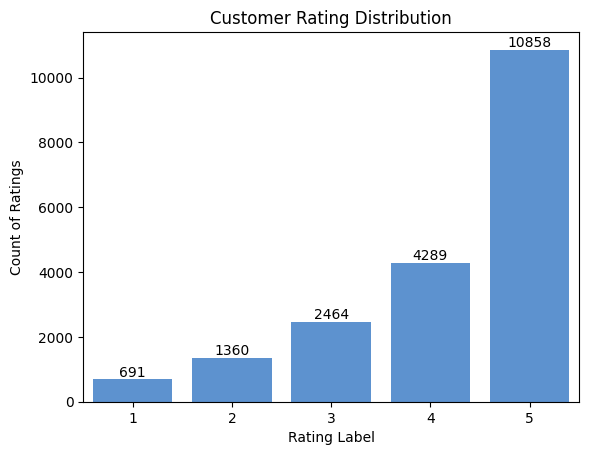

In [ ]:
# Create the countplot with the specified color
sns.countplot(x=data['Rating'], data=data, color='#4a90e2')  # Set the desired color

# Set the title and labels
plt.title('Customer Rating Distribution', fontsize=12)
plt.xlabel("Rating Label", fontsize=10)
plt.ylabel("Count of Ratings", fontsize=10)

# Add value annotations on top of each bar
for index, value in enumerate(data['Rating'].value_counts().sort_values()):
    plt.text(index, value, f"{value}", ha="center", va="bottom", fontsize=10)

# Show the plot
plt.show()

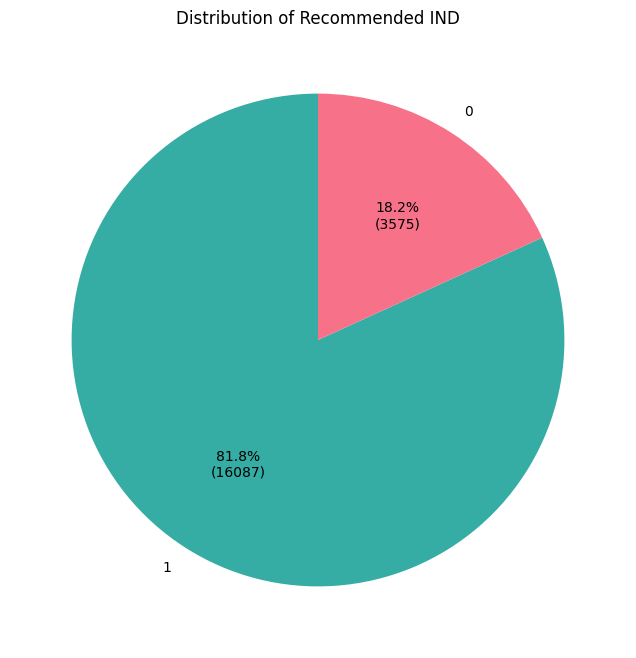

In [ ]:
# Count the occurrences of each value in 'Recommended IND'
recommended_counts = data['Recommended IND'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
colors = ['#36ADA4', '#F77189']
plt.pie(recommended_counts, labels=recommended_counts.index, autopct=lambda pct: '{:.1f}%\n({:d})'.format(pct, int(pct/100.*recommended_counts.sum())), colors=colors, startangle=90)
plt.title('Distribution of Recommended IND')
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 52.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 75.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 85.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 91.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 96.0% of the points cannot be plac

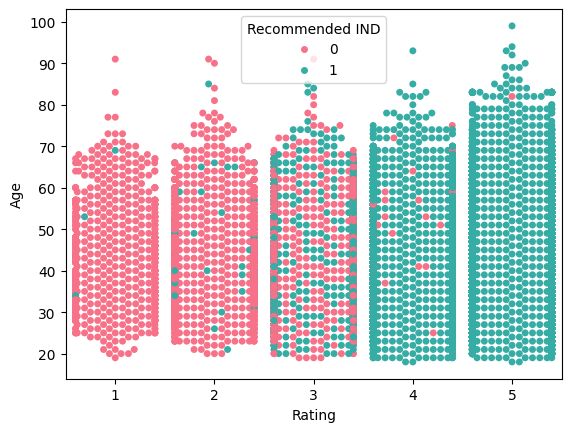

In [ ]:
sns.swarmplot(y="Age", x="Rating", hue="Recommended IND", data=data, palette="husl");

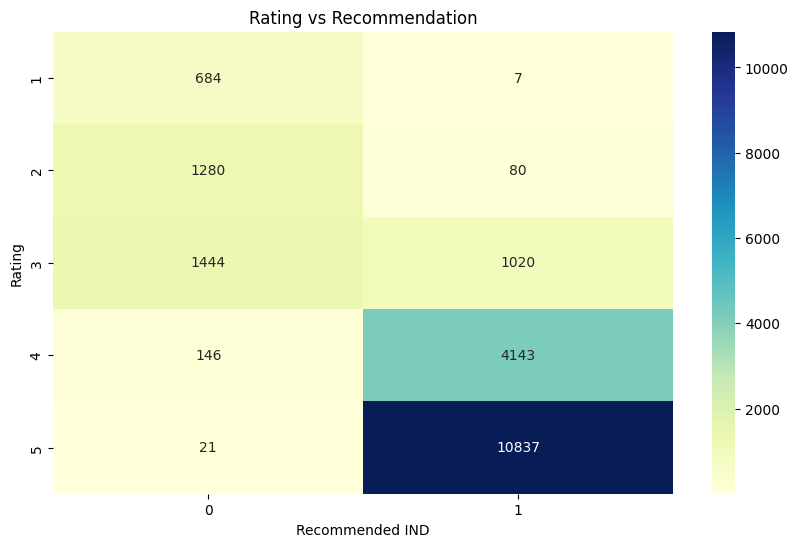

In [ ]:
# Group the data by rating and recommendation and count the occurrences
rating_recommend_counts = data.groupby(['Rating', 'Recommended IND'])['Clothing ID'].count().unstack()

# Plot a heatmap of the rating vs recommendation counts
plt.figure(figsize=(10, 6))
sns.heatmap(rating_recommend_counts, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Rating vs Recommendation')
plt.xlabel('Recommended IND')
plt.ylabel('Rating')
plt.show()

In [ ]:
# Download the VADER lexicon
nltk.download('vader_lexicon')

# Initialize the VADER sentiment intensity analyzer
sid = SentimentIntensityAnalyzer()

# Function to classify sentiment based on VADER score
def classify_sentiment_vader(review):
    scores = sid.polarity_scores(review)
    compound_score = scores['compound']
    if compound_score >= 0.05:
        return "positive"
    elif compound_score <= -0.05:
        return "negative"
    else:
        return "neutral"

# Apply sentiment classification to the review text
data['Sentiment_VADER'] = data['Review Text'].apply(classify_sentiment_vader)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


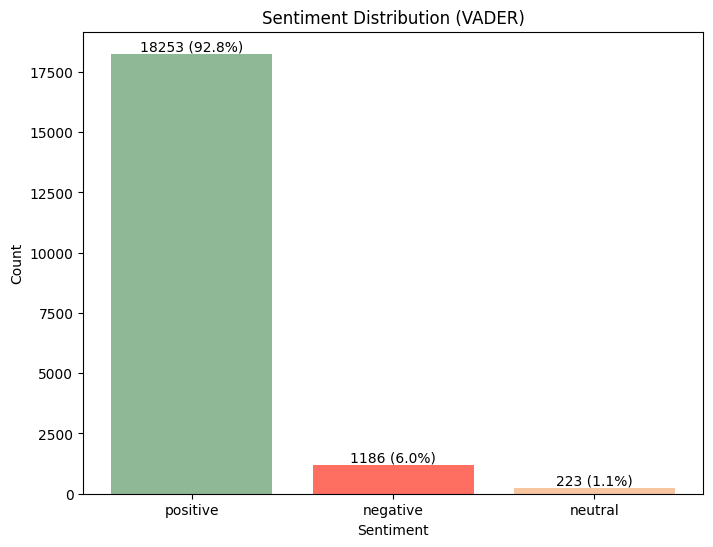

In [ ]:
# Count the number of positive, negative, and neutral reviews
sentiment_counts = data['Sentiment_VADER'].value_counts()

# Define custom colors for each sentiment
colors = ['#8FB996', '#FF6F61', '#F7C59F']

# Create a bar plot with custom colors
plt.figure(figsize=(8, 6))
bars = plt.bar(sentiment_counts.index, sentiment_counts.values, color=colors)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution (VADER)')

# Add labels with both count and percentage
total = sentiment_counts.sum()
for bar in bars:
    height = bar.get_height()
    label_text = f'{height} ({height/total:.1%})'
    plt.text(bar.get_x() + bar.get_width() / 2, height, label_text, ha='center', va='bottom')

plt.show()


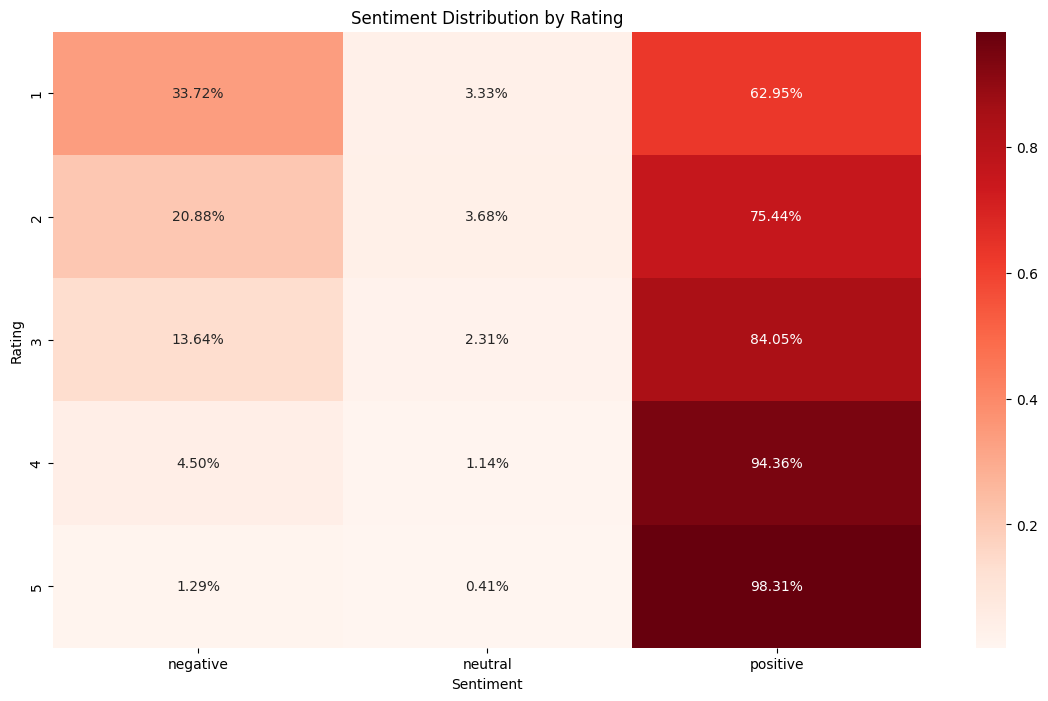

In [ ]:
# Segment by Ratings
rating_sentiment = data.groupby('Rating')['Sentiment_VADER'].value_counts(normalize=True).unstack()

# Plotting the results
plt.figure(figsize=(14, 8))
sns.heatmap(rating_sentiment, annot=True, fmt='.2%', cmap='Reds')
plt.title('Sentiment Distribution by Rating')
plt.xlabel('Sentiment')
plt.ylabel('Rating')
plt.show()

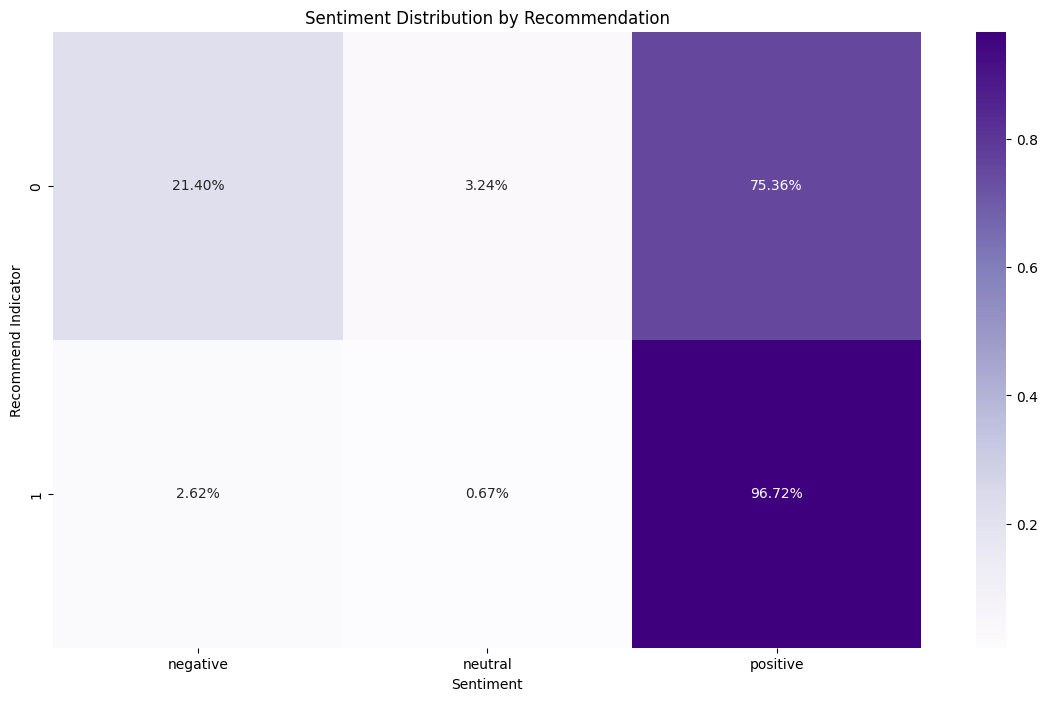

In [ ]:
# Segment by Recommend Indicator
recommend_sentiment = data.groupby('Recommended IND')['Sentiment_VADER'].value_counts(normalize=True).unstack()

#Plot figure
plt.figure(figsize=(14, 8))
sns.heatmap(recommend_sentiment, annot=True, fmt='.2%', cmap='Purples')
plt.title('Sentiment Distribution by Recommendation')
plt.xlabel('Sentiment')
plt.ylabel('Recommend Indicator')
plt.show()

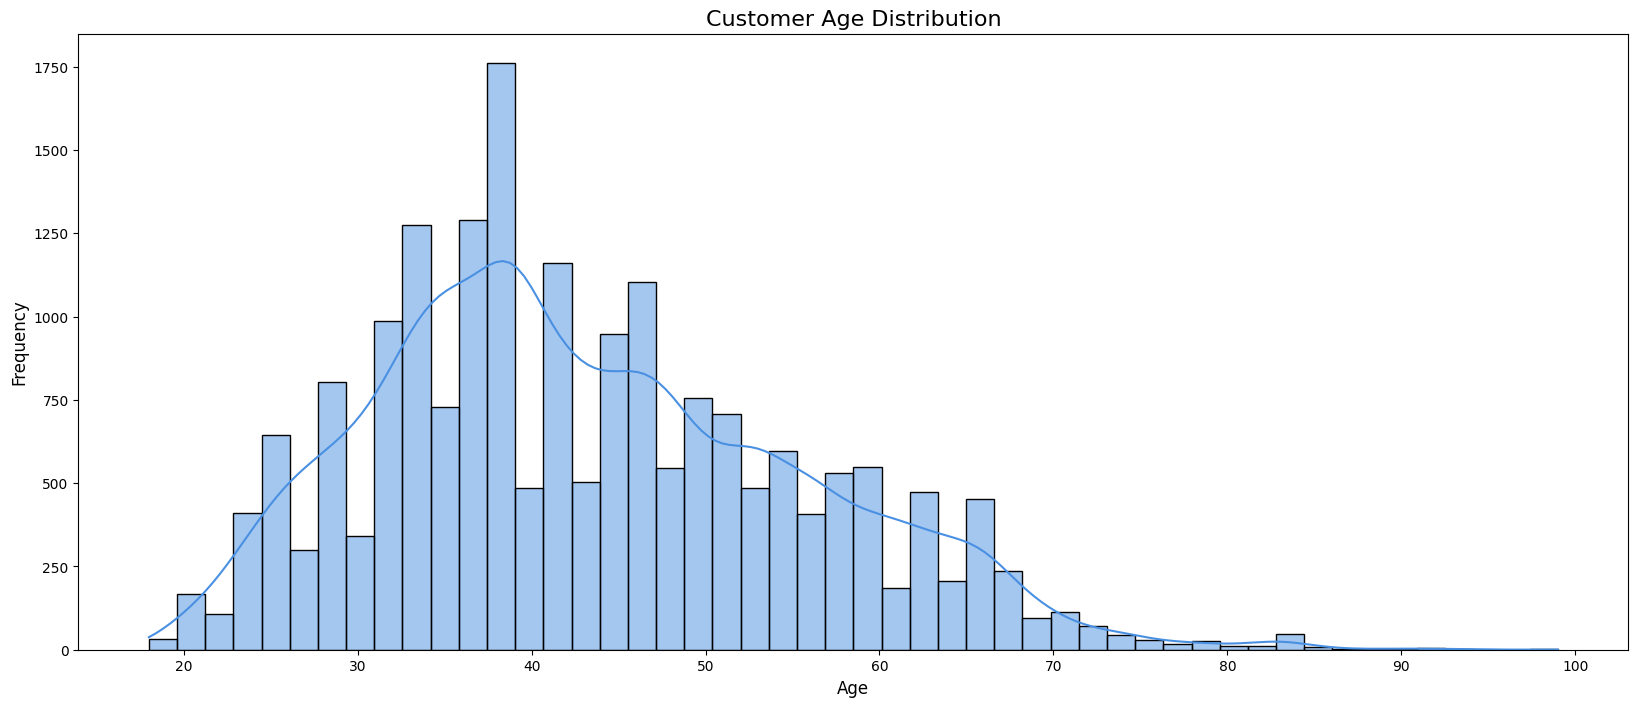

In [ ]:
# Adjust the figure size
plt.figure(figsize=(20, 8))

# Set the title and labels
plt.title('Customer Age Distribution', fontsize=16)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

# Plot the histogram with the desired color
sns.histplot(data, x='Age', kde=True, bins=50, color='#4a90e2')

# Show the plot
plt.show()

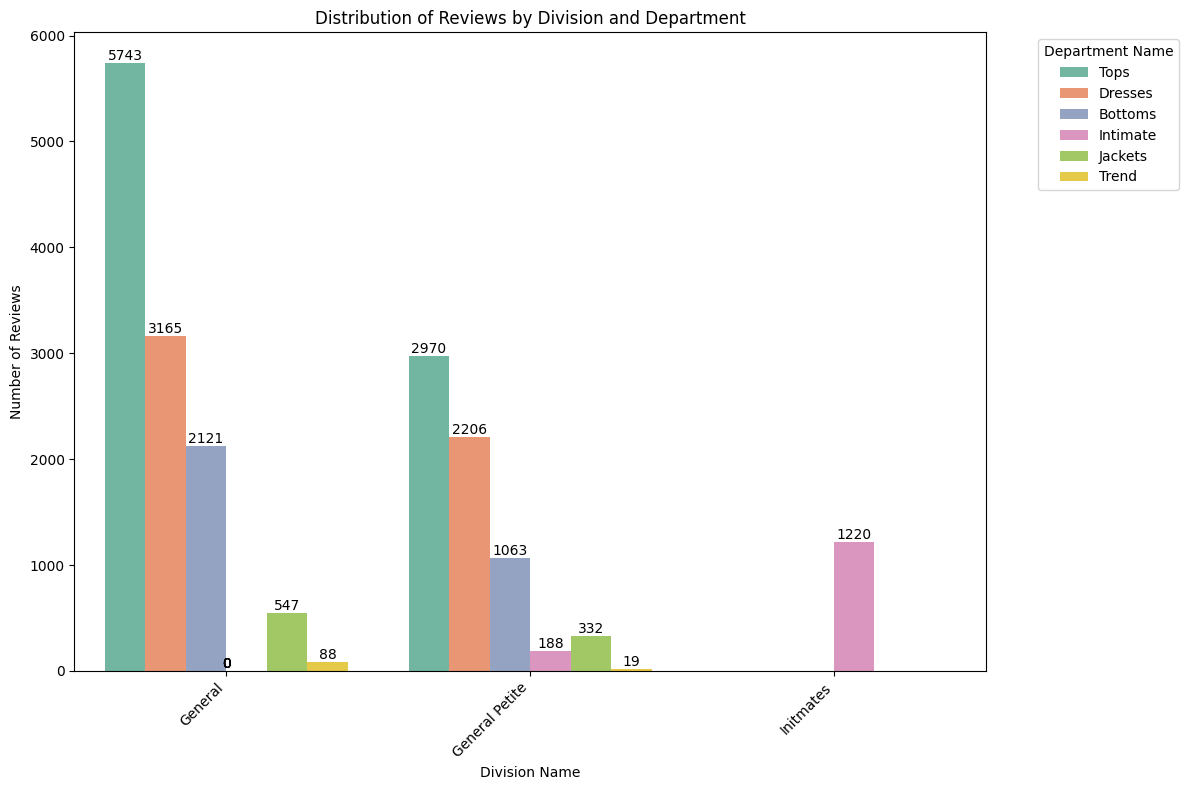

In [ ]:
# Group by Division Name and Department Name, then count the number of reviews
division_department_counts = data.groupby(['Division Name', 'Department Name']).size().reset_index(name='Review Count')

# Sort the data by Review Count for better visualization
division_department_counts = division_department_counts.sort_values(by='Review Count', ascending=False)

# Set the plot size
plt.figure(figsize=(12, 8))

# Plotting the bar chart with seaborn
bar_plot = sns.barplot(data=division_department_counts, x='Division Name', y='Review Count', hue='Department Name', palette='Set2')

# Add count on each bar
for p in bar_plot.patches:
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    count = int(y)
    bar_plot.text(x, y, f'{count}', ha='center', va='bottom', fontsize=10)

# Add titles and labels
plt.title('Distribution of Reviews by Division and Department')
plt.xlabel('Division Name')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Department Name', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

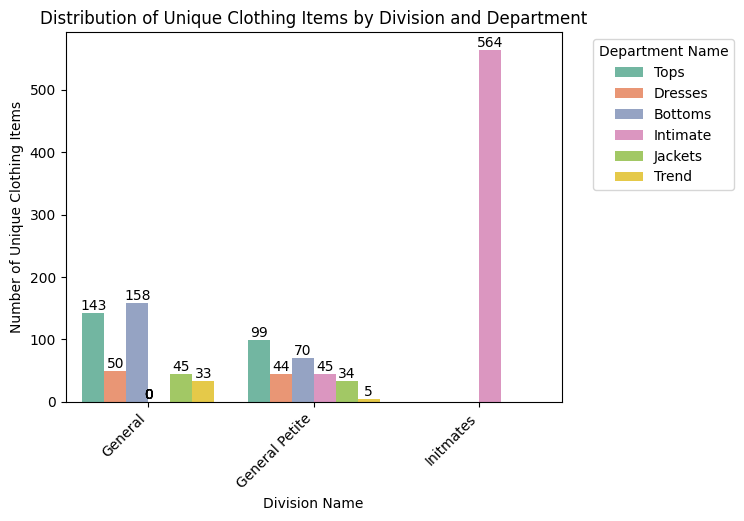

<Figure size 2000x1400 with 0 Axes>

In [ ]:
# Assuming 'data' is your original DataFrame
division_department_unique_items = data.groupby(['Division Name', 'Department Name'])['Clothing ID'].nunique().reset_index(name='Unique Clothing Items Count')

# Define the order of divisions and departments
division_order = ['General', 'General Petite', 'Initmates']
department_order = ['Tops','Dresses','Bottoms', 'Intimate', 'Jackets', 'Trend']

# Define a consistent color palette
colors = sns.color_palette("Set2", n_colors=len(department_order))
color_mapping = dict(zip(department_order, colors))

# Create a color palette based on the department order
palette = [color_mapping[dept] for dept in department_order]

# Plotting the bar chart with seaborn
bar_plot = sns.barplot(
    data=division_department_unique_items,
    x='Division Name',
    y='Unique Clothing Items Count',
    hue='Department Name',
    palette=palette,
    order=division_order,
    hue_order=department_order
)

# Add count labels on each bar
for p in bar_plot.patches:
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    count = int(y)
    bar_plot.text(x, y, f'{count}', ha='center', va='bottom', fontsize=10)

# Add titles and labels
plt.title('Distribution of Unique Clothing Items by Division and Department')
plt.xlabel('Division Name')
plt.ylabel('Number of Unique Clothing Items')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Department Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.figure(figsize=(20,14))

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
# Group the data by 'Division Name' and 'Department Name' and calculate the required metrics
result = data.groupby(['Division Name', 'Department Name']).agg(
    Total_Unique_Clothing_ID=('Clothing ID', 'nunique'),
    Total_Count_Rating=('Rating', 'count'),
    Total_Count_Recommended_IND=('Recommended IND', 'sum'),
    Total_Count_Text_Review=('Review Text', 'count')
).reset_index()

In [ ]:
from google.colab import data_table
data_table.DataTable(result)

<ipython-input-29-ec993c907bac>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-29-ec993c907bac>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-29-ec993c907bac>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


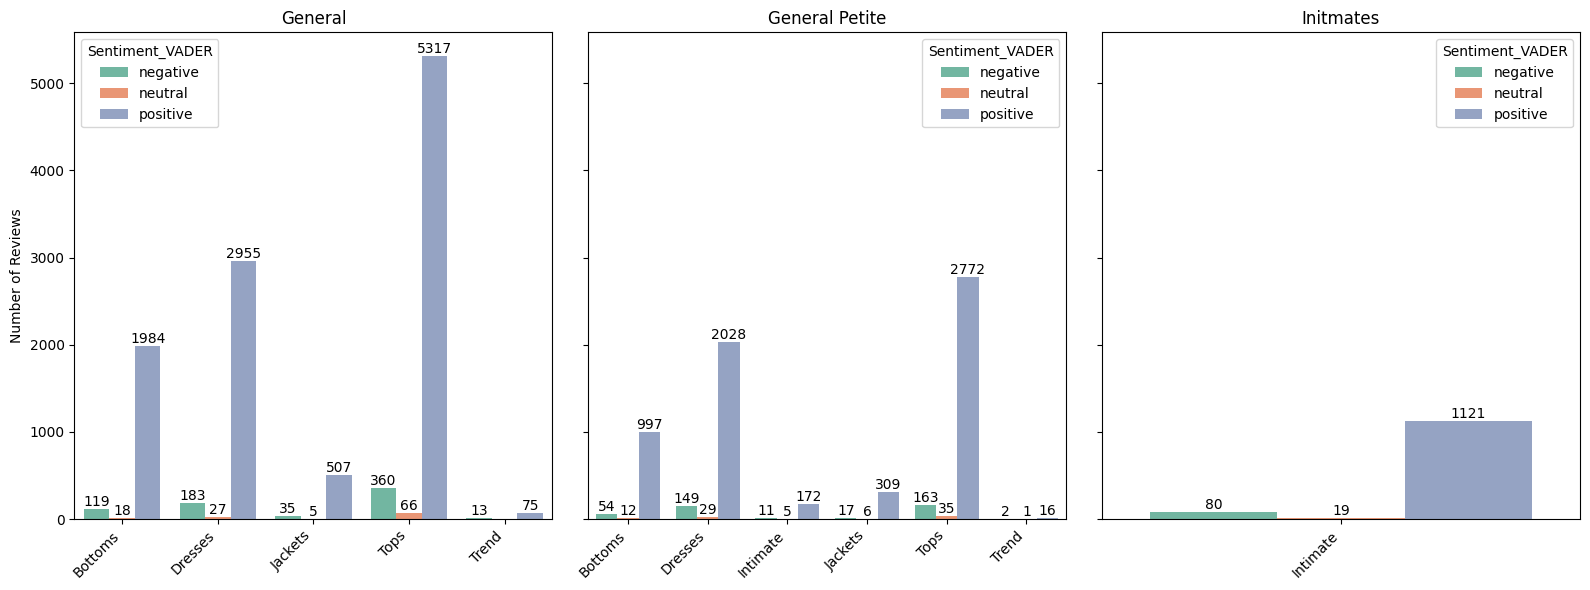

In [ ]:
# Group by Division Name, Department Name, and Sentiment to get the review counts
division_department_sentiment_counts = data.groupby(['Division Name', 'Department Name', 'Sentiment_VADER']).size().reset_index(name='Review Count')

# Get unique divisions for subplots
divisions = division_department_sentiment_counts['Division Name'].unique()

# Create subplots for each division
fig, axes = plt.subplots(nrows=1, ncols=len(divisions), figsize=(16, 6), sharey=True)

# Plot each division separately
for ax, division in zip(axes, divisions):
    subset = division_department_sentiment_counts[division_department_sentiment_counts['Division Name'] == division]
    sns.barplot(data=subset, x='Department Name', y='Review Count', hue='Sentiment_VADER', ax=ax, palette='Set2')
    ax.set_title(division)
    ax.set_xlabel('')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    if ax == axes[0]:
        ax.set_ylabel('Number of Reviews')
    else:
        ax.set_ylabel('')

    # Add labels on each bar
    for container in ax.containers:
        ax.bar_label(container)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

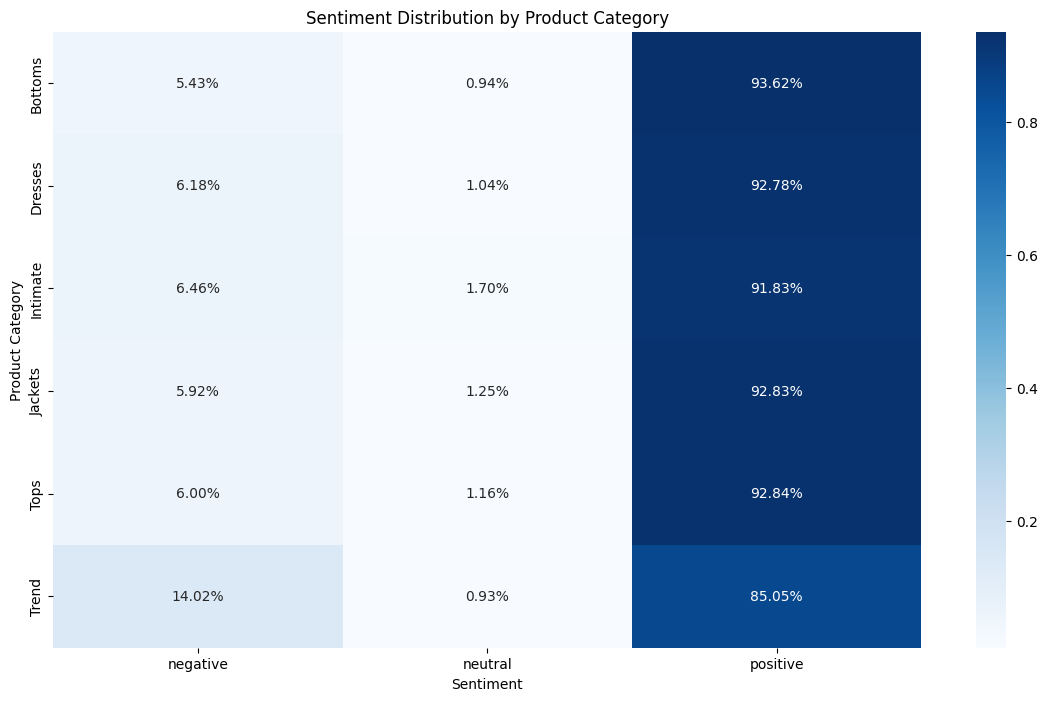

In [ ]:
# Segment by Product Category
category_sentiment = data.groupby('Department Name')['Sentiment_VADER'].value_counts(normalize=True).unstack()

# Plotting the results
plt.figure(figsize=(14, 8))
sns.heatmap(category_sentiment, annot=True, fmt='.2%', cmap='Blues')
plt.title('Sentiment Distribution by Product Category')
plt.xlabel('Sentiment')
plt.ylabel('Product Category')
plt.show()

<ipython-input-31-16cda8ec33f5>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_sentiment = data.groupby('Age Group')['Sentiment_VADER'].value_counts(normalize=True).unstack()


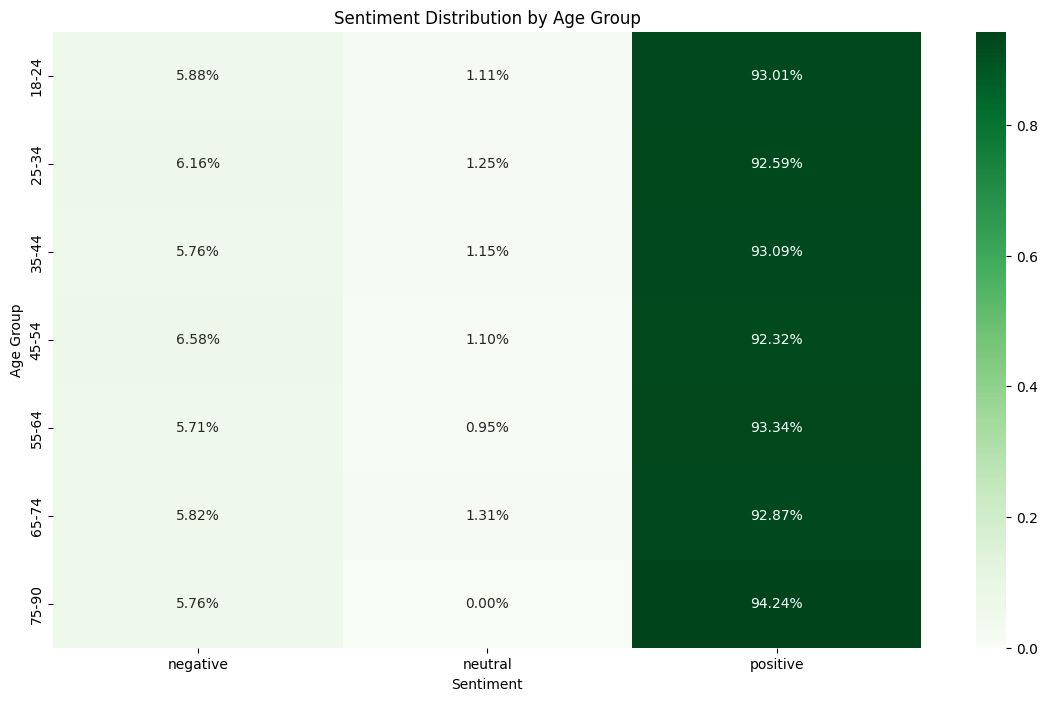

In [ ]:
# Segment by Age Groups
data['Age Group'] = pd.cut(data['Age'], bins=[18, 25, 35, 45, 55, 65, 75, 91], labels=['18-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75-90'])
age_group_sentiment = data.groupby('Age Group')['Sentiment_VADER'].value_counts(normalize=True).unstack()

# Plotting the results
plt.figure(figsize=(14, 8))
sns.heatmap(age_group_sentiment, annot=True, fmt='.2%', cmap='Greens')
plt.title('Sentiment Distribution by Age Group')
plt.xlabel('Sentiment')
plt.ylabel('Age Group')
plt.show()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Top 10 words in positive Reviews:
dress: 8696
love: 7534
size: 7363
fit: 6275
top: 6206
like: 5864
wear: 5435
great: 5205
would: 4439
fabric: 3963




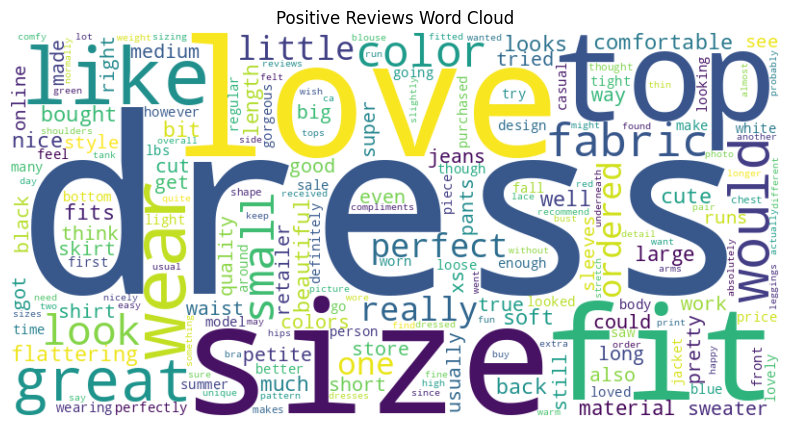

Top 10 words in negative Reviews:
dress: 527
size: 372
would: 360
like: 355
fabric: 303
back: 282
top: 257
fit: 254
wear: 236
small: 230




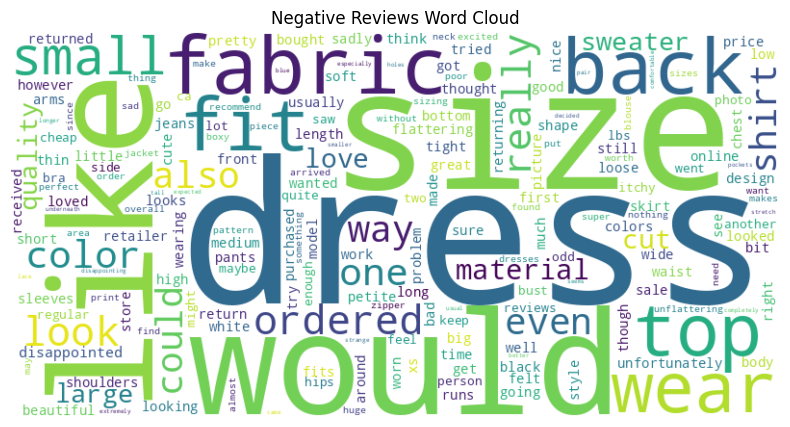

Top 10 words in neutral Reviews:
dress: 74
size: 68
small: 52
would: 52
like: 46
ordered: 39
top: 38
one: 38
look: 35
wear: 34




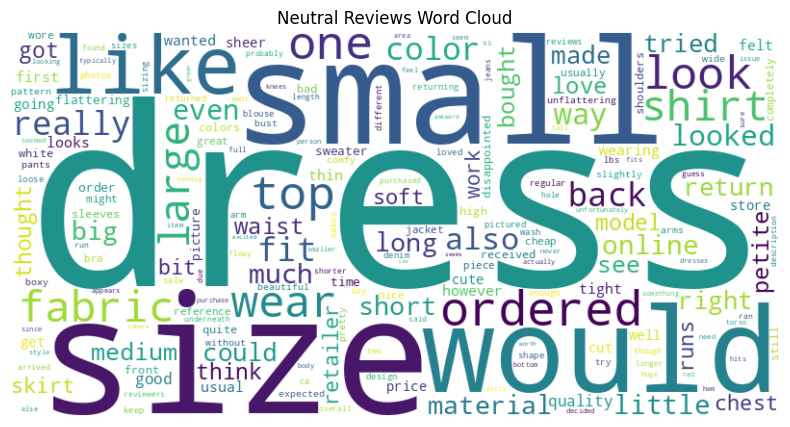

In [ ]:
# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Define basic stop words
stop_words = set(stopwords.words('english'))

# Function to extract all words excluding stopwords
def extract_all_words(text):
    tokens = word_tokenize(text.lower())
    return [word for word in tokens if word.isalpha() and word not in stop_words]  # Includes all words, filters out stopwords and non-alphabetic words

# Function to print the top 10 most common words for each sentiment classification
def print_top_words(words, classification):
    counter = Counter(words)
    most_common_words = counter.most_common(10)
    print(f"Top 10 words in {classification} Reviews:")
    for word, freq in most_common_words:
        print(f"{word}: {freq}")
    print("\n")

# Function to generate word cloud
def generate_wordcloud(words, title):
    if not words:
        print(f"No words found for {title}. Skipping word cloud generation.")
        return
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(Counter(words))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Iterate over each sentiment category
for classification in ['positive', 'negative', 'neutral']:
    # Filter reviews by the VADER sentiment classification
    reviews = data[data['Sentiment_VADER'] == classification]['Review Text'].dropna()

    # Extract all words excluding stopwords
    words = []
    for review in reviews:
        words.extend(extract_all_words(review))

    # Print top 10 words
    print_top_words(words, classification)

    # Generate word cloud if words are present
    generate_wordcloud(words, f'{classification.capitalize()} Reviews Word Cloud')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Top 10 words in positive Reviews:
great: 4477
small: 3112
soft: 2371
comfortable: 2057
large: 1877
nice: 1726
good: 1313
black: 1283
true: 1272
beautiful: 1188




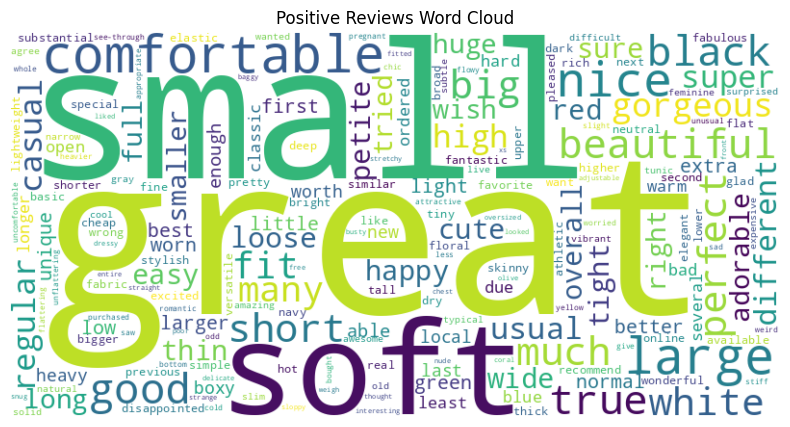

Top 10 words in negative Reviews:
small: 210
large: 143
big: 114
disappointed: 98
soft: 87
short: 87
much: 75
good: 72
bad: 72
white: 71




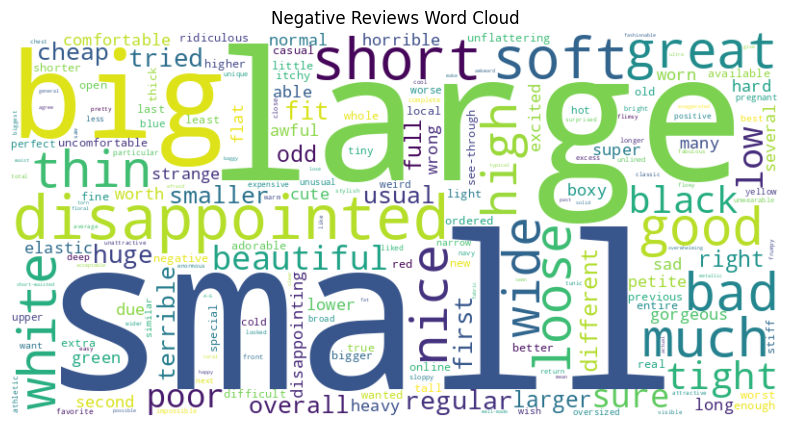

Top 10 words in neutral Reviews:
small: 49
large: 29
big: 19
short: 15
much: 15
good: 14
usual: 12
right: 12
soft: 12
bad: 10




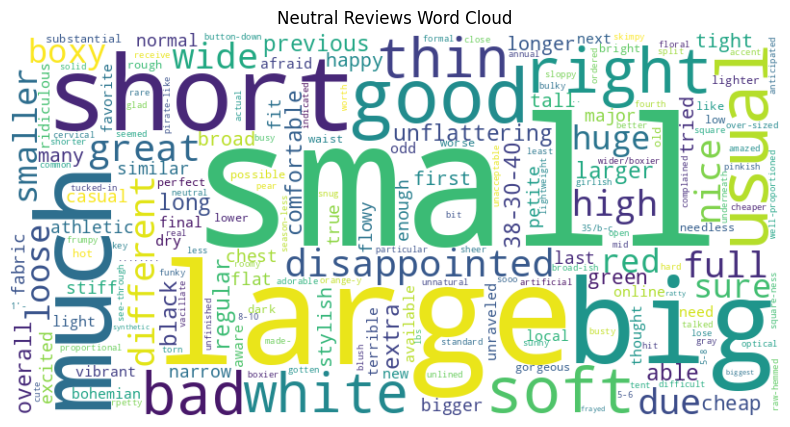

In [ ]:
import re
from nltk import word_tokenize, pos_tag
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

# Define basic stop words
stop_words = set(stopwords.words('english')) | {'wear'}

# Function to remove irrelevant contexts and unnecessary words
def remove_irrelevant_contexts(text):
    if not isinstance(text, str):
        return None

    irrelevant_patterns = [
        r'\ba little bit\b', r'\ba little more\b', r'\ba little too\b',
        r'\ba little less\b', r'\ba little\b'
    ]

    for pattern in irrelevant_patterns:
        if re.search(pattern, text, re.IGNORECASE):
            return None

    tokens = word_tokenize(text.lower())
    tagged_tokens = pos_tag(tokens)

    filtered_tokens = []
    for word, tag in tagged_tokens:
        if word in {"'m", "'s"}:
            continue
        if word == "top" or "tops" and tag.startswith("NN"):
            continue
        if word in stop_words:
            continue

        filtered_tokens.append(word)

    return ' '.join(filtered_tokens)

# Function to extract adjectives and verbs
def extract_adjectives_verbs(text):
    tokens = word_tokenize(text.lower())
    tagged = pos_tag(tokens)
    return [word for word, tag in tagged if (tag.startswith('JJ')) and word not in stop_words]

# Function to print the top 10 most common words for each sentiment classification
def print_top_words(words, classification):
    counter = Counter(words)
    most_common_words = counter.most_common(10)
    print(f"Top 10 words in {classification} Reviews:")
    for word, freq in most_common_words:
        print(f"{word}: {freq}")
    print("\n")

# Function to generate word cloud
def generate_wordcloud(words, title):
    if not words:
        print(f"No words found for {title}. Skipping word cloud generation.")
        return
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(Counter(words))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Iterate over each sentiment category
for classification in ['positive', 'negative', 'neutral']:
    # Filter reviews by the VADER sentiment classification and apply context removal
    reviews = data[data['Sentiment_VADER'] == classification]['Review Text'].dropna()
    filtered_reviews = reviews.apply(remove_irrelevant_contexts).dropna()

    # Extract adjectives and verbs
    words = []
    for review in filtered_reviews:
        words.extend(extract_adjectives_verbs(review))

    # Print top 10 words
    print_top_words(words, classification)

    # Generate word cloud if words are present
    generate_wordcloud(words, f'{classification.capitalize()} Reviews Word Cloud')


Top 10 words in positive Reviews:
dress: 8181
size: 7363
color: 3835
fit: 3674
fabric: 3673
top: 3220
bit: 2288
length: 2220
material: 2193
jeans: 2031




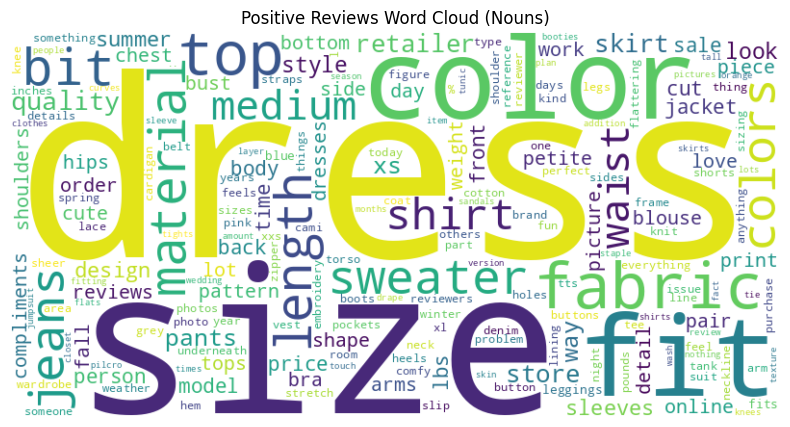

Top 10 words in negative Reviews:
dress: 517
size: 372
fabric: 293
color: 201
shirt: 178
way: 177
material: 169
sweater: 149
quality: 147
fit: 131




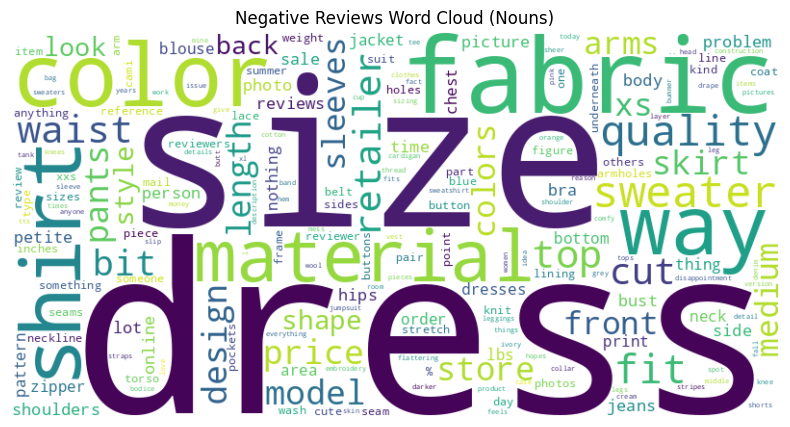

Top 10 words in neutral Reviews:
dress: 72
size: 68
shirt: 31
color: 28
way: 27
fabric: 26
material: 21
online: 18
medium: 18
top: 17




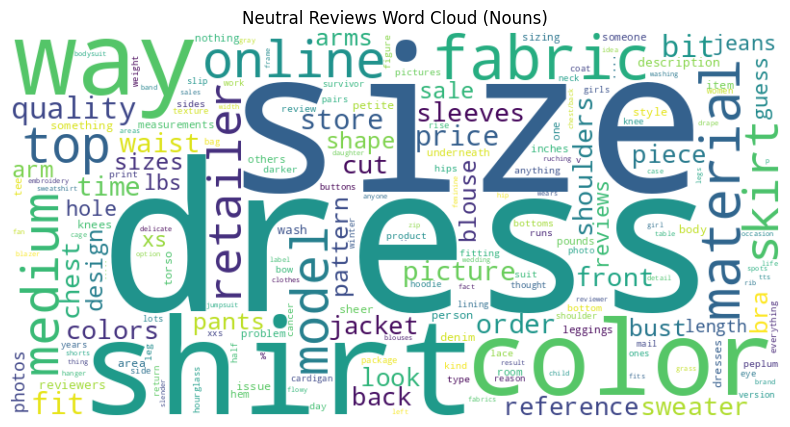

In [ ]:
# Function to extract nouns
def extract_nouns(text):
    tokens = word_tokenize(text.lower())
    tagged = pos_tag(tokens)
    return [word for word, tag in tagged if tag.startswith('NN') and word not in stop_words]

# Function to print the top 10 most common words for each sentiment classification
def print_top_words(words, classification):
    counter = Counter(words)
    most_common_words = counter.most_common(10)
    print(f"Top 10 words in {classification} Reviews:")
    for word, freq in most_common_words:
        print(f"{word}: {freq}")
    print("\n")

# Function to generate word cloud
def generate_wordcloud(words, title):
    if not words:
        print(f"No words found for {title}. Skipping word cloud generation.")
        return
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(Counter(words))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Iterate over each sentiment category
for classification in ['positive', 'negative', 'neutral']:
    # Filter reviews by the VADER sentiment classification and apply context removal
    reviews = data[data['Sentiment_VADER'] == classification]['Review Text'].dropna()

    # Extract nouns
    words = []
    for review in reviews:
        words.extend(extract_nouns(review))

    # Print top 10 words
    print_top_words(words, classification)

    # Generate word cloud if words are present
    generate_wordcloud(words, f'{classification.capitalize()} Reviews Word Cloud (Nouns)')
